# Data Loading

In [2]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.cbook import boxplot_stats

In [3]:
# Standardization of the appearence of the graphics.

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [4]:
# Standardization of the appearence of the graphics.

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [5]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_excel('bike_day_v2.xlsx', engine='openpyxl')
ds.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
instant,732.0,366.352459,1.0,183.75,366.5,549.25,731.0,211.236679
dteday,732,2012-01-01 08:27:32.459016448,2011-01-01 00:00:00,2011-07-02 18:00:00,2012-01-01 12:00:00,2012-07-02 06:00:00,2012-12-31 00:00:00,NaN
season,732.0,2.497268,1.0,2.0,3.0,3.0,4.0,1.110203
yr,732.0,0.501366,0.0,0.0,1.0,1.0,1.0,0.50034
mnth,732.0,6.523224,1.0,4.0,7.0,10.0,12.0,3.450769
holiday,732.0,0.028689,0.0,0.0,0.0,0.0,1.0,0.167044
weekday,730.0,3.00274,0.0,1.0,3.0,5.0,6.0,2.004793
workingday,732.0,0.68306,0.0,0.0,1.0,1.0,1.0,0.465602
schoolday,454.0,0.460352,0.0,0.0,0.0,1.0,1.0,0.498975
weathersit,732.0,1.394809,1.0,1.0,1.0,2.0,3.0,0.544718


There are 732 entries of bike rental from January 2011 to December 2012 (2 years). There are weather situation ranging from Clear, mist and light snow; no heavy rain. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max) hum: Normalized humidity. The values are divided to 100 (max) windspeed: Normalized wind speed. The values are divided to 67 (max)

In [6]:
# Show top rows
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,schoolday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6.0,0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0.0,0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1.0,1,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2.0,1,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3.0,1,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data Understanding

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     732 non-null    int64         
 1   dteday      732 non-null    datetime64[ns]
 2   season      732 non-null    int64         
 3   yr          732 non-null    int64         
 4   mnth        732 non-null    int64         
 5   holiday     732 non-null    int64         
 6   weekday     730 non-null    float64       
 7   workingday  732 non-null    int64         
 8   schoolday   454 non-null    float64       
 9   weathersit  732 non-null    int64         
 10  temp        732 non-null    float64       
 11  atemp       732 non-null    float64       
 12  hum         732 non-null    float64       
 13  windspeed   732 non-null    float64       
 14  casual      732 non-null    int64         
 15  registered  732 non-null    int64         
 16  cnt         732 non-null  

he dataset has a total of 17 columns. 6 float, 10 integers and 1 datetime. There are 278 missing values in school day. and 2 missing value in weekday.

In [8]:
ds.isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         2
workingday      0
schoolday     278
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

There are 278 missing values in school day. and 2 missing value in weekday.

In [9]:
ds['schoolday'].value_counts()

schoolday
0.0    245
1.0    209
Name: count, dtype: int64

In [10]:
#Check for duplicates on ds
ds.duplicated().sum()

1

In [11]:
ds[ds['instant'].duplicated(keep=False)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,schoolday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6.0,0,0.0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
624,624,2012-09-15,3,1,9,0,6.0,0,0.0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


#  Data Cleaning

## First we detect the outliers through visualization¶

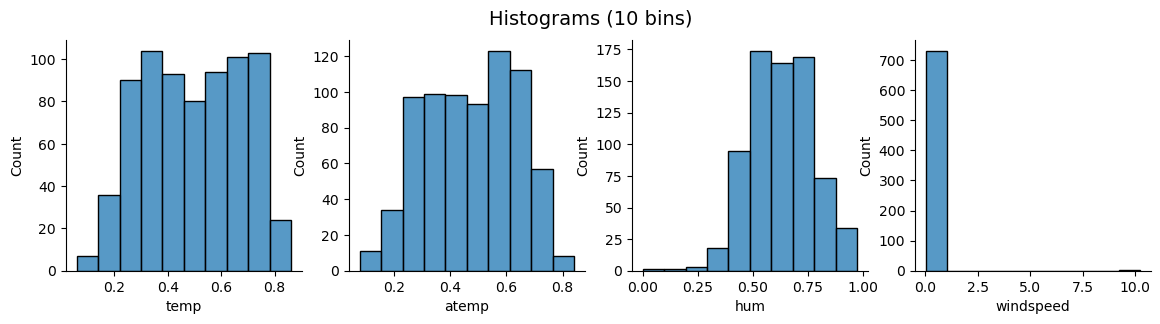

In [13]:
# Identify numeric variables of the columns where we suspect to be Outliers
numerical=['temp', 'atemp', 'hum', 'windspeed']

# Draw
fig, ax = plt.subplots(1, 4, figsize=(14,3))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms (10 bins)", fontsize=plots_Title_fontSize);

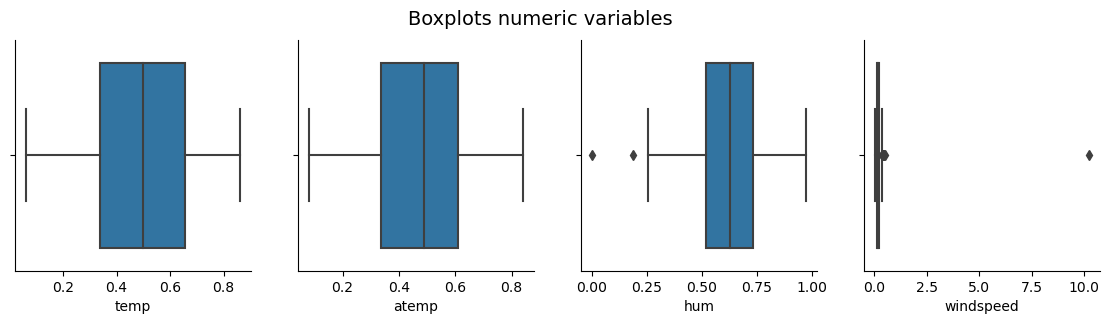

In [14]:
# BOXPLOT of the 4 categories
# Draw
fig, ax = plt.subplots(1, 4, figsize=(14,3))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables", fontsize=plots_Title_fontSize);

ig.suptitle("Boxplots numeric variables", fontsize=plots_Title_fontSize);
Based on the distribution, we can see there are outliers in hum & windspeed variables. We took a deeper understanding of what value these columns may bring if we keep it in the report. On instant 94( 4/4/2011) the windspeed was 10. It is one outlier that needs to be removed. In terms of humidity 2 instants (no. 50 and 69) need to be removed with less than 0.25 level of humidity 3/10/2011 2/19/2011. Row 191,196 has no values in the weekdays. 

## Removing outliers and redundant columns¶

In [46]:
ds_new = ds[~ds['instant'].isin([94, 50, 69,191,196,624])]

In [47]:
ds_new.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
instant,725.0,367.34069,1.0,185.0,368.0,549.0,731.0,210.766782
dteday,725,2012-01-02 08:10:35.586206976,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-03 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,725.0,2.49931,1.0,2.0,3.0,3.0,4.0,1.111995
yr,725.0,0.503448,0.0,0.0,1.0,1.0,1.0,0.500333
mnth,725.0,6.529655,1.0,4.0,7.0,10.0,12.0,3.45704
holiday,725.0,0.028966,0.0,0.0,0.0,0.0,1.0,0.167825
weekday,725.0,2.991724,0.0,1.0,3.0,5.0,6.0,2.000673
workingday,725.0,0.685517,0.0,0.0,1.0,1.0,1.0,0.46463
schoolday,447.0,0.463087,0.0,0.0,0.0,1.0,1.0,0.499194
weathersit,725.0,1.395862,1.0,1.0,1.0,2.0,3.0,0.542894


In [48]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 731
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     725 non-null    int64         
 1   dteday      725 non-null    datetime64[ns]
 2   season      725 non-null    int64         
 3   yr          725 non-null    int64         
 4   mnth        725 non-null    int64         
 5   holiday     725 non-null    int64         
 6   weekday     725 non-null    float64       
 7   workingday  725 non-null    int64         
 8   schoolday   447 non-null    float64       
 9   weathersit  725 non-null    int64         
 10  temp        725 non-null    float64       
 11  atemp       725 non-null    float64       
 12  hum         725 non-null    float64       
 13  windspeed   725 non-null    float64       
 14  casual      725 non-null    int64         
 15  registered  725 non-null    int64         
 16  cnt         725 non-null    int

## Addressing 278 missing values in the Schoolday column

In [21]:
ds_known = ds_new[ds_new['schoolday'].notnull()].copy()
ds_missing = ds_new[ds_new['schoolday'].isnull()].copy()

In [22]:
feature_cols = ['weekday', 'holiday', 'workingday']

In [23]:
# Prepare X and y
X_known = ds_known[feature_cols]
y_known = ds_known['schoolday'].astype(int)  # make sure it's numeric (0/1)

In [24]:
# Train a small classification model
clf = RandomForestClassifier()
clf.fit(X_known, y_known)

RandomForestClassifier()

In [34]:
# Predict on missing rows
X_missing = ds_missing[feature_cols]
ds_missing['schoolday'] = clf.predict(X_missing)

In [35]:
# Merge back
ds_clean = pd.concat([ds_known, ds_missing], axis=0).sort_index()

In [49]:
ds_clean['schoolday'].value_counts()

schoolday
1.0    402
0.0    323
Name: count, dtype: int64

In [43]:
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 731
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     725 non-null    int64         
 1   dteday      725 non-null    datetime64[ns]
 2   season      725 non-null    int64         
 3   yr          725 non-null    int64         
 4   mnth        725 non-null    int64         
 5   holiday     725 non-null    int64         
 6   weekday     725 non-null    float64       
 7   workingday  725 non-null    int64         
 8   schoolday   725 non-null    float64       
 9   weathersit  725 non-null    int64         
 10  temp        725 non-null    float64       
 11  atemp       725 non-null    float64       
 12  hum         725 non-null    float64       
 13  windspeed   725 non-null    float64       
 14  casual      725 non-null    int64         
 15  registered  725 non-null    int64         
 16  cnt         725 non-null    int

In [39]:
ds_clean.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
instant,725.0,367.34069,1.0,185.0,368.0,549.0,731.0,210.766782
dteday,725,2012-01-02 08:10:35.586206976,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-03 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,725.0,2.49931,1.0,2.0,3.0,3.0,4.0,1.111995
yr,725.0,0.503448,0.0,0.0,1.0,1.0,1.0,0.500333
mnth,725.0,6.529655,1.0,4.0,7.0,10.0,12.0,3.45704
holiday,725.0,0.028966,0.0,0.0,0.0,0.0,1.0,0.167825
weekday,725.0,2.991724,0.0,1.0,3.0,5.0,6.0,2.000673
workingday,725.0,0.685517,0.0,0.0,1.0,1.0,1.0,0.46463
schoolday,725.0,0.554483,0.0,0.0,1.0,1.0,1.0,0.497366
weathersit,725.0,1.395862,1.0,1.0,1.0,2.0,3.0,0.542894


In [44]:
ds_clean = ds_clean.drop(columns=['casual', 'registered', 'temp'])

In [45]:
ds_clean.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
instant,725.0,367.34069,1.0,185.0,368.0,549.0,731.0,210.766782
dteday,725,2012-01-02 08:10:35.586206976,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-03 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,725.0,2.49931,1.0,2.0,3.0,3.0,4.0,1.111995
yr,725.0,0.503448,0.0,0.0,1.0,1.0,1.0,0.500333
mnth,725.0,6.529655,1.0,4.0,7.0,10.0,12.0,3.45704
holiday,725.0,0.028966,0.0,0.0,0.0,0.0,1.0,0.167825
weekday,725.0,2.991724,0.0,1.0,3.0,5.0,6.0,2.000673
workingday,725.0,0.685517,0.0,0.0,1.0,1.0,1.0,0.46463
schoolday,725.0,0.554483,0.0,0.0,1.0,1.0,1.0,0.497366
weathersit,725.0,1.395862,1.0,1.0,1.0,2.0,3.0,0.542894


# Data Exploration

In [50]:
# check season cardinality
ds_clean['season'].value_counts()

season
3    185
2    183
1    179
4    178
Name: count, dtype: int64

In [51]:
# check season cardinality
ds_clean['mnth'].value_counts()

mnth
1     62
5     62
8     62
10    62
12    62
3     61
6     60
7     60
11    60
4     59
9     59
2     56
Name: count, dtype: int64

In [54]:
# check holiday cardinality
ds_clean['holiday'].value_counts()

holiday
0    704
1     21
Name: count, dtype: int64

In [55]:
# check workingday cardinality
ds_clean['workingday'].value_counts()

workingday
1    497
0    228
Name: count, dtype: int64

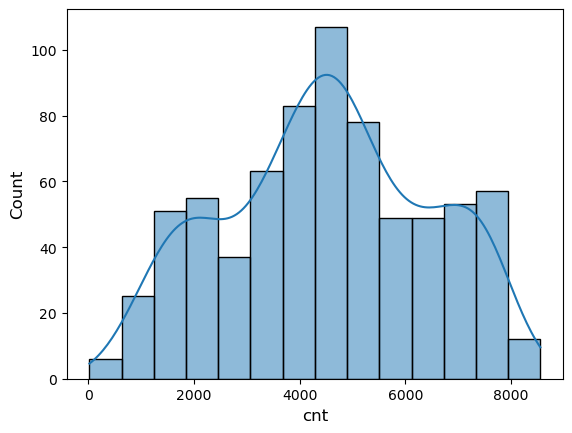

In [56]:
# Plot target distribution
sns.histplot(ds_clean['cnt'], kde=True)
plt.show()

# Modeling